In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [6]:
#Set the randomisation reproducability
np.random.seed(0)

### Dataset creation with datapoints for dogs and cats
### 1. Dogs have high ear_flappiness_index and low whisker_length
### 2. Cats have low ear_flappiness_index and high whisker_length

In [7]:
#Create dogs datapoints
dogs_whisker_length = np.random.normal(loc=5,scale=1,size=10)
dogs_ear_flappiness_index = np.random.normal(loc=8,scale=1,size=10)

In [8]:
#Create cat datapoints
cats_whisker_length = np.random.normal(loc=8,scale=1,size=10)
cats_ear_flappiness_index = np.random.normal(loc=5,scale=1,size=10)

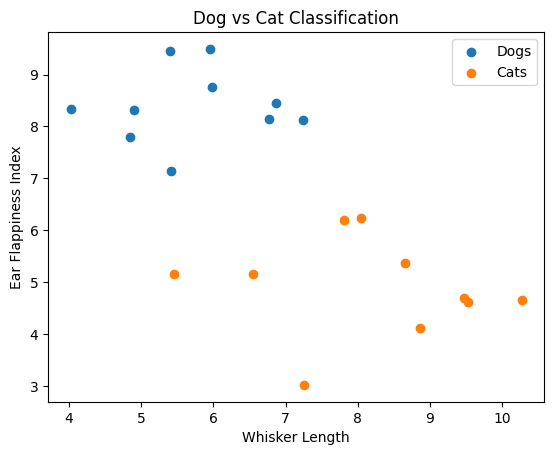

In [9]:
plt.scatter(dogs_whisker_length,dogs_ear_flappiness_index,label='Dogs')
plt.scatter(cats_whisker_length,cats_ear_flappiness_index,label='Cats')
plt.xlabel("Whisker Length")
plt.ylabel("Ear Flappiness Index")
plt.title("Dog vs Cat Classification")
plt.legend()
plt.show()

In [10]:
#Implementing an random linear classifier algorithm

def random_linear_classifier(data_dogs,data_cats,k,d):
    #d is the number of featues:2

    best_error = float('inf')
    best_theta =  None
    best_theta0 = None

    for _ in range(k):
        theta = np.random.normal(size=d)
        theta0 = np.random.normal()

        error = compute_error(data_dogs,data_cats,theta,theta0)

        if error < best_error:
            best_error = error
            best_theta = theta
            best_theta0 = theta0
    
    return best_theta,best_theta0

In [11]:
#Dot product equation is implemented
##For dogs actual data is >0
##For cats actual data is <0
def compute_error(data_dogs,data_cats,theta,theta0):
    error = 0
    for x_dog in data_dogs:
        if np.dot(theta,x_dog) + theta0 <= 0:
            error +=1
    for x_cat in data_cats:
        if np.dot(theta,x_cat)+theta0 >= 0:
            error += 1
    return error


In [12]:
dogs_data = np.vstack((dogs_whisker_length,dogs_ear_flappiness_index)).T
cat_data = np.vstack((cats_whisker_length,cats_ear_flappiness_index)).T

In [16]:
# Run the algorithm

k = 100 #number of iteration to find the best line
d = 2 #number of features in data

best_theta, best_theta0 =random_linear_classifier(dogs_data,cat_data,k,d)

In [17]:
best_theta, best_theta0

(array([-1.17915793,  1.30142807]), 0.8952602728899299)

In [20]:
#plot the best decision boundary:
x_vals = np.linspace(2,10,100)
y_vals = (-best_theta[0] / best_theta[1] * x_vals -(best_theta0 / best_theta[1]))

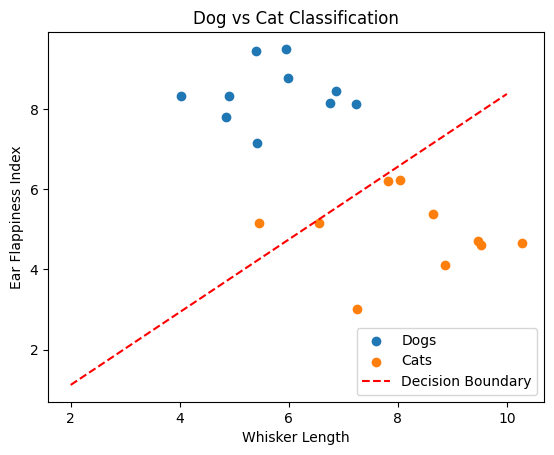

In [22]:
plt.scatter(dogs_whisker_length,dogs_ear_flappiness_index,label='Dogs')
plt.scatter(cats_whisker_length,cats_ear_flappiness_index,label='Cats')
plt.xlabel("Whisker Length")
plt.ylabel("Ear Flappiness Index")
plt.title("Dog vs Cat Classification")
plt.plot(x_vals,y_vals,linestyle='--',label='Decision Boundary',color = 'red')
plt.legend()
plt.show()